<a href="https://colab.research.google.com/github/lsmanoel/PowerEletronics/blob/master/heatsink/heatsink_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de Dissipador (Heatsink Calculation)
Lucas Seara Manoel e Diogo Tavares


![alt text](https://raw.githubusercontent.com/lsmanoel/PowerEletronics/master/heatsink/images/circuito_conversorBuck.png)

**Cálculos Preliminares (Preliminary Calculations):**
$$DutyCycle: D = \frac{V_{out}}{V_{in}}$$
$$I_{out} = \frac{P}{V_{out}}$$ 
$$R_{load} = \frac{V_{out}}{I_{out}}$$
$$\Delta I_L = \frac{V_{out}(1-D)}{fL}$$
$$\Delta V_{out} = \frac{V_{out}(1-D)}{8CLf²}$$

In [1]:
v_in = 36
v_out = 12
f=100e3
L=500e-6
C=100e-6
P=100

duty_cycle = v_out/v_in
i_out = P/v_out
R_load = v_out/i_out
delta_iL = (v_out*(1-duty_cycle))/(f*L)
delta_vout = (v_out*(1-duty_cycle))/(8*C*L*f**2)

print('Duty Cycle:', duty_cycle)
print('i_out:', i_out, 'A')
print('R_load:', R_load, 'ohns')
print('delta_iL:', delta_iL, 'A')
print('delta_vout:', delta_vout, 'V')

Duty Cycle: 0.3333333333333333
i_out: 8.333333333333334 A
R_load: 1.44 ohns
delta_iL: 0.16 A
delta_vout: 0.0019999999999999996 V


8.413333333333334 8.253333333333334


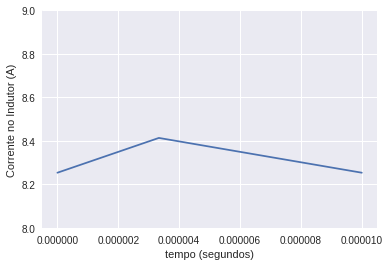

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plot_size = 100

T = 1/f
t = np.linspace(0, T, plot_size)
i = np.zeros(plot_size)

i_max = i_out + delta_iL/2
i_min = i_out - delta_iL/2
print(i_max, i_min)

i[:int(plot_size*duty_cycle)] =(delta_iL)/(T*duty_cycle)*t[:int(plot_size*duty_cycle)] + i_min
  
i[int(plot_size*duty_cycle):]=(-delta_iL)/(T*(1-duty_cycle))*t[:int(plot_size*(1-duty_cycle))+1]  + i_max

plt.xlabel('tempo (segundos)')
plt.ylabel('Corrente no Indutor (A)')
plt.ylim([8, 9])
plt.plot(t, i)
